In [11]:
import random
from sklearn.neighbors import NearestNeighbors
import time

def generate_cities(num_cities):
    cities = []
    for _ in range(num_cities):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        z = random.randint(0, 50)
        cities.append((x, y, z))
    return cities

# Example: Generate 5 cities
cities = generate_cities(8)
print("Generated cities:", cities)


Generated cities: [(49, 69, 49), (6, -9, 1), (-1, 4, 22), (76, 8, 29), (-30, -57, 16), (67, 93, 8), (-53, -2, 50), (-18, 62, 32)]


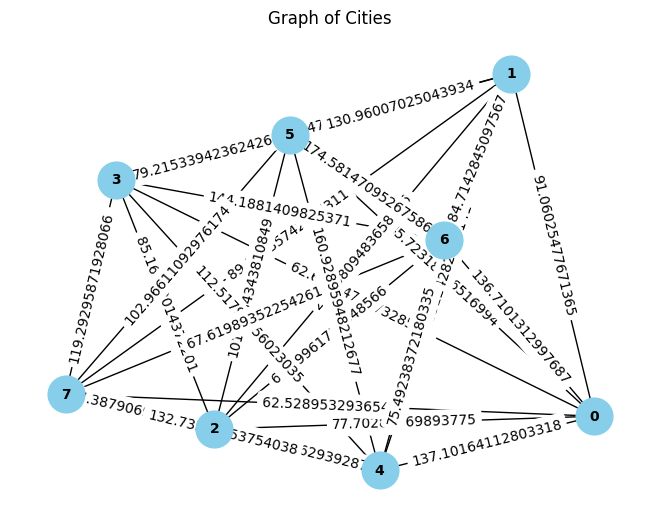

In [12]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def calculate_distance(city1, city2):
    x1, y1, z1 = city1
    x2, y2, z2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

def create_graph(cities, connections_percentage=1.0, symmetrical=True):
    num_cities = len(cities)
    graph = {i: {} for i in range(num_cities)}
    
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            if random.random() < connections_percentage:
                cost = calculate_distance(cities[i], cities[j])
                if symmetrical:
                    # Adjust cost for asymmetrical scenario
                    cost *= 1.1 if cities[i][2] < cities[j][2] else 0.9
                graph[i][j] = cost
                graph[j][i] = cost
    
    return graph

# Tworzenie grafu
graph = create_graph(cities, connections_percentage=1.0, symmetrical=True)

# Rysowanie grafu
G = nx.Graph()
for i, neighbors in graph.items():
    for j, cost in neighbors.items():
        G.add_edge(i, j, weight=cost)

pos = nx.spring_layout(G)  # Ustalenie pozycji węzłów
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph of Cities")
plt.show()

start_city = 0

In [13]:
def tsp_greedy_nearest_neighbor(graph, start):
    num_cities = len(graph)
    visited = [False] * num_cities
    path = [start]
    total_cost = 0
    current_city = start
    visited[start] = True

    while len(path) < num_cities:
        nearest_neighbor = None
        min_cost = float('inf')

        for neighbor, cost in graph[current_city].items():
            if not visited[neighbor] and cost < min_cost:
                nearest_neighbor = neighbor
                min_cost = cost

        if nearest_neighbor is not None:
            path.append(nearest_neighbor)
            total_cost += min_cost
            visited[nearest_neighbor] = True
            current_city = nearest_neighbor

    # Add the cost to return to the starting city
    total_cost += graph[path[-1]][start]

    return path, total_cost


In [14]:
def tsp_greedy_mst(graph, start):
    mst = nx.minimum_spanning_tree(nx.Graph(graph))
    dfs_edges = list(nx.dfs_edges(mst, source=start))
    path = [start] + [v for u, v in dfs_edges]
    total_cost = sum(graph[u][v] for u, v in dfs_edges)

    # Add the cost to return to the starting city
    total_cost += graph[path[-1]][start]

    return path, total_cost

# Solve TSP using greedy nearest neighbor algorithm
shortest_path_greedy_nn, min_cost_greedy_nn = tsp_greedy_nearest_neighbor(graph, start_city)
print("Shortest path using Greedy Nearest Neighbor:", shortest_path_greedy_nn, "Cost:", min_cost_greedy_nn)

# Solve TSP using greedy MST algorithm
shortest_path_greedy_mst, min_cost_greedy_mst = tsp_greedy_mst(graph, start_city)
print("Shortest path using Greedy MST:", shortest_path_greedy_mst, "Cost:", min_cost_greedy_mst)


Shortest path using Greedy Nearest Neighbor: [0, 5, 3, 1, 2, 4, 6, 7] Cost: 504.8592570702969
Shortest path using Greedy MST: [0, 1, 2, 3, 4, 5, 6, 7] Cost: 676.0337656032605


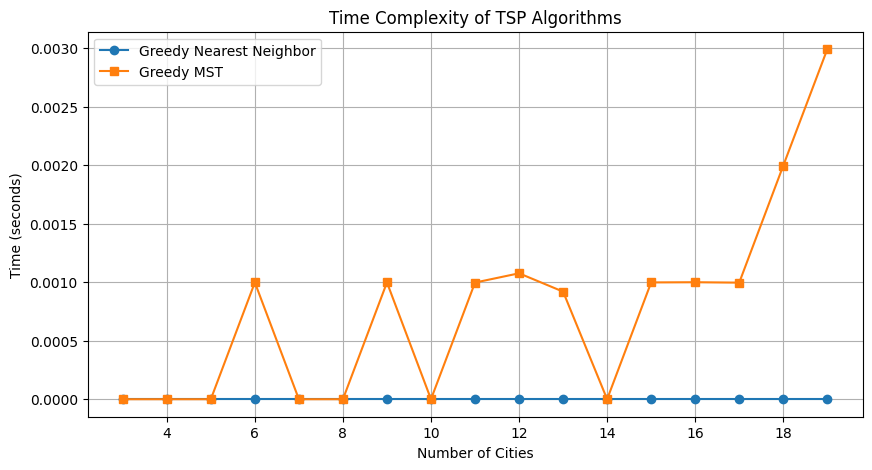

In [15]:
# Test and measure time for different number of cities
num_cities_range = range(3, 20)
times_greedy_nn = []
times_greedy_mst = []

for num_cities in num_cities_range:
    cities = generate_cities(num_cities)
    graph = create_graph(cities, connections_percentage=1.0, symmetrical=True)
    
    start_city = 0

    start_time = time.time()
    tsp_greedy_nearest_neighbor(graph, start_city)
    end_time = time.time()
    times_greedy_nn.append(end_time - start_time)
    
    start_time = time.time()
    tsp_greedy_mst(graph, start_city)
    end_time = time.time()
    times_greedy_mst.append(end_time - start_time)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(num_cities_range, times_greedy_nn, marker='o', label='Greedy Nearest Neighbor')
plt.plot(num_cities_range, times_greedy_mst, marker='s', label='Greedy MST')
plt.xlabel('Number of Cities')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of TSP Algorithms')
plt.legend()
plt.grid(True)
plt.show()